In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import h5py
import numpy as np
import matplotlib.pyplot as plt
from lightcurves_from_images import *

In [3]:
image_path = "/home/rcarrasco/simulated_data/image_sequences/may23_bck.hdf5"
camera_and_obs_cond_path = "../real_obs/pickles/camera_and_obs_cond.pkl"
save_path = "/home/rcarrasco/simulated_data/image_sequences/lightcurves_from_images/"
file_name = "testing_phot"
bands = ["g",]
chunk_size = 100
times_seeing = 2.0*(1/(2*np.sqrt(2*np.log(2))))

photometry = ImagePhotometry(images_path=image_path,
                             obs_cond=camera_and_obs_cond_path,
                             bands=bands,
                             save_path=save_path,
                             chunk_size=chunk_size,
                             times_seeing=times_seeing)

image_data = photometry.image_data

In [4]:
field = "Field01"
band = "g"
print(list(image_data[field].keys()))
lc_type = image_data[field]["lc_type"][:]
object_index = np.where(lc_type=="Supernovae")[0]
print(object_index[:60])
ex_index = 346
seq_example_keys = ["images", "psf_image", "galaxy_image", "count_lightcurves"]
example_data = {}
for name in seq_example_keys:
    example_data[name] = image_data[field][name][band][ex_index, ...]
seeing = image_data[field]["obs_cond"]["seeing"]["g"][:]
days = image_data[field]["obs_cond"]["obs_day"]["g"][:]
print(np.amin(image_data[field]["lightcurves"][band][ex_index, ...]))
#GOOD INDEX FOR SUPERNOVAE 161, 346, 402

['count_lightcurves', 'galaxy_flag', 'galaxy_image', 'ids', 'images', 'labels', 'lc_type', 'lightcurves', 'obs_cond', 'psf_image']
[ 12  21  26  40  42  45  48  55  56  57  63  64  79  84  88  92 106 115
 119 123 133 156 157 161 173 176 177 178 185 210 215 216 217 227 232 238
 258 265 270 273 280 288 295 308 316 319 325 339 342 346 353 365 370 374
 381 395 397 402 413 426]
21.619785


In [5]:
sky, sky_variance = photometry.estimate_sky_from_images(field)
mask, _ = photometry.get_apperture_mask(seeing)#, times_seeing=times_seeing)

In [6]:
est_lc, est_variance, residuals, clean = photometry.get_lightcurve(example_data["images"],
                                                                   example_data["galaxy_image"],
                                                                   example_data["psf_image"],
                                                                   mask,
                                                                   sky,
                                                                   sky_variance)


estimated values
[-2.90700e+01 -8.60300e+01  2.81000e+01  4.95600e+01  3.38100e+01
  5.04100e+01 -4.85300e+01 -3.18200e+01  2.00000e+00 -6.70100e+01
  2.77000e+00 -6.47000e+01 -7.35000e+00  3.13000e+01  2.54100e+01
 -4.98100e+01  7.91000e+00 -1.73500e+01  2.88200e+01  7.51000e+00
  8.58100e+01  8.57300e+01  3.66700e+02  4.37890e+02  4.24540e+02
  1.42998e+03  1.42991e+03  1.96478e+03  2.06818e+03]
estimated variance
[50.16755214 50.72528399 48.83805858 50.80599441 51.83227425 49.40718492
 48.73571056 48.99291504 49.11625352 55.07673988 55.03540948 51.89188027
 50.42851114 49.85938471 50.70174158 49.80674902 53.65752235 48.9452835
 51.7715165  48.81788306 58.23129878 49.15077716 53.95500004 52.88316817
 51.72911981 66.40047332 58.7947316  94.42610474 90.9466088 ]
simulated values
[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
    0.    0.    0.    0.    0.    0.    0.    0.  107.  231.  427.  487.
  515. 1444. 1505. 2038. 2080.]


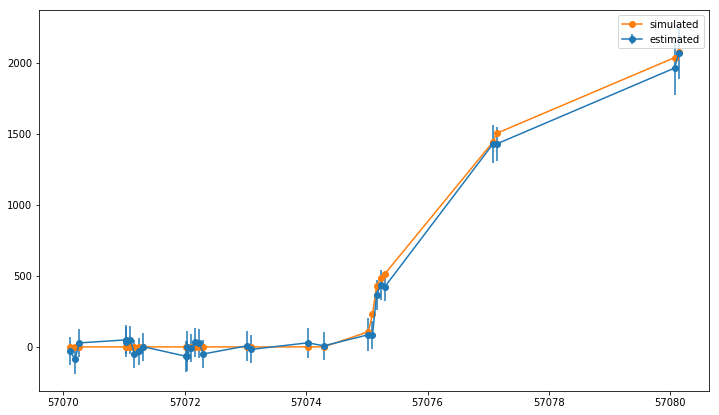

time 0


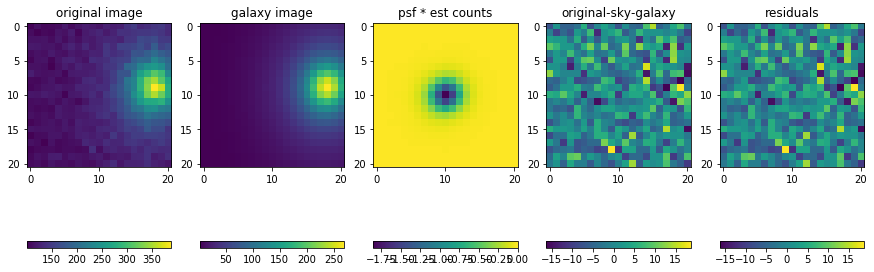

time 1


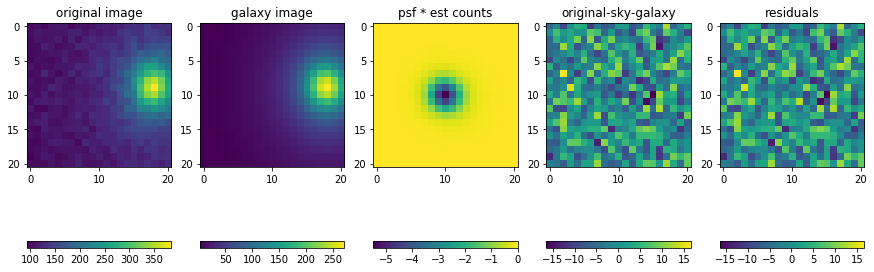

time 2


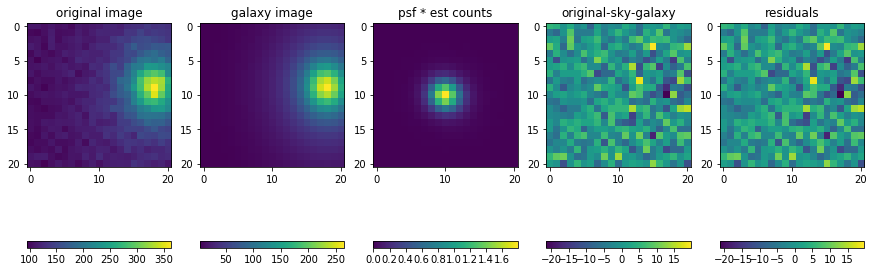

time 3


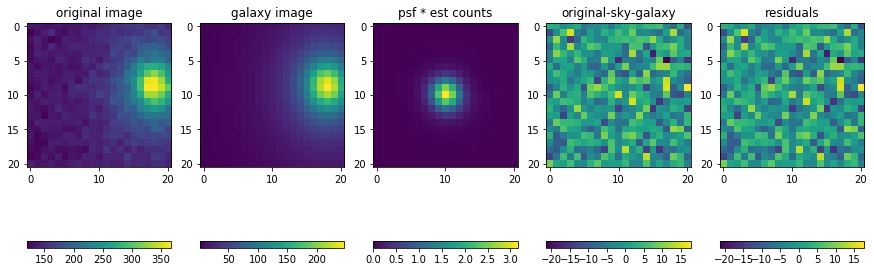

time 4


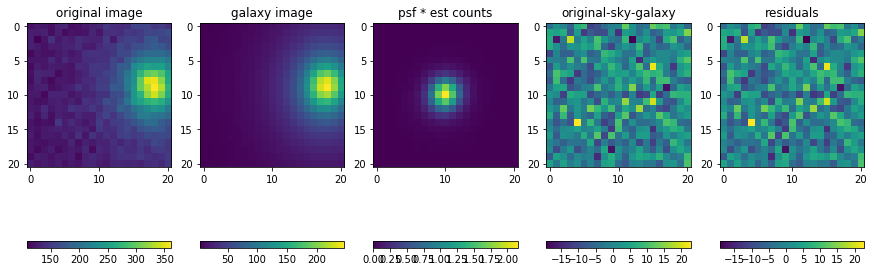

time 5


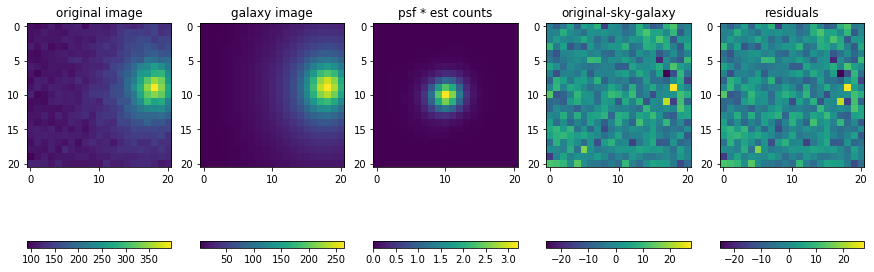

time 6


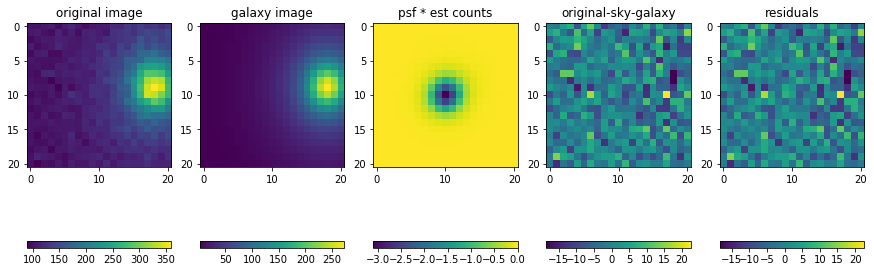

time 7


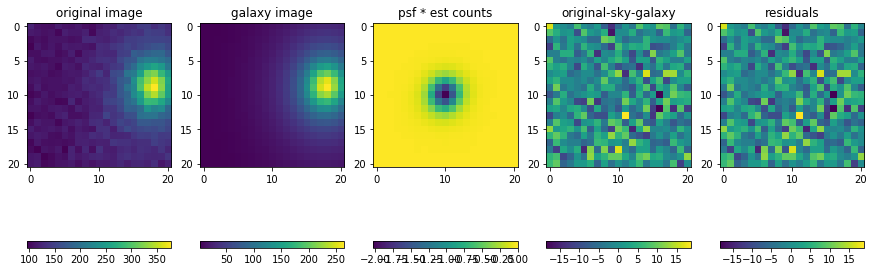

time 8


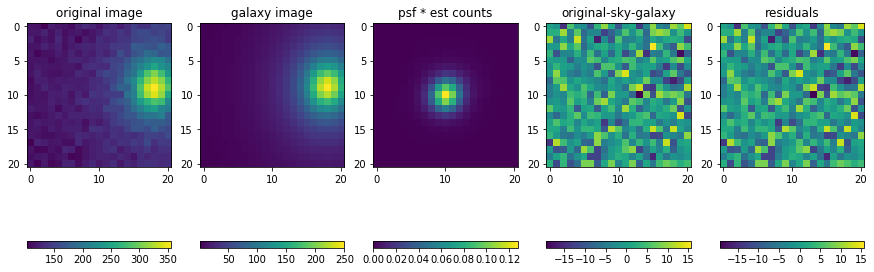

time 9


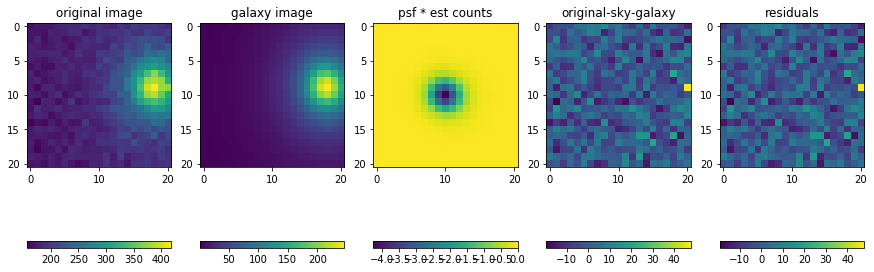

time 10


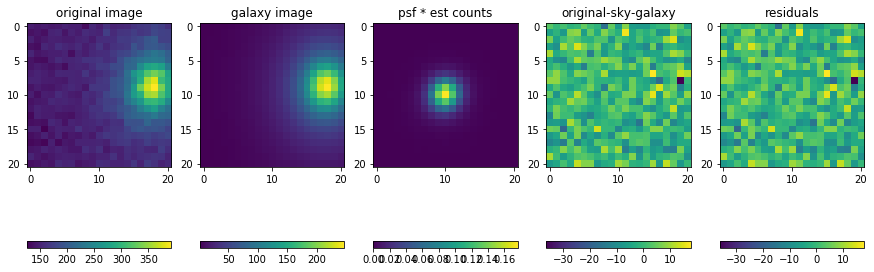

time 11


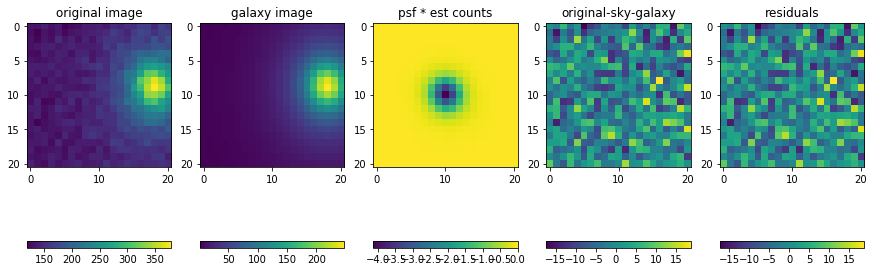

time 12


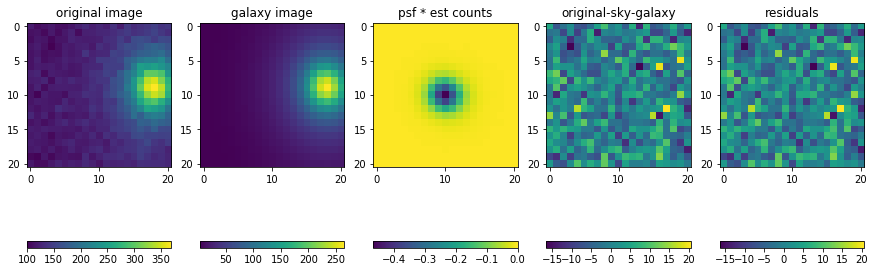

time 13


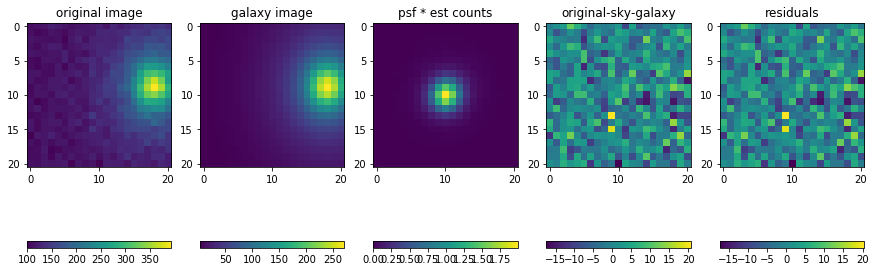

time 14


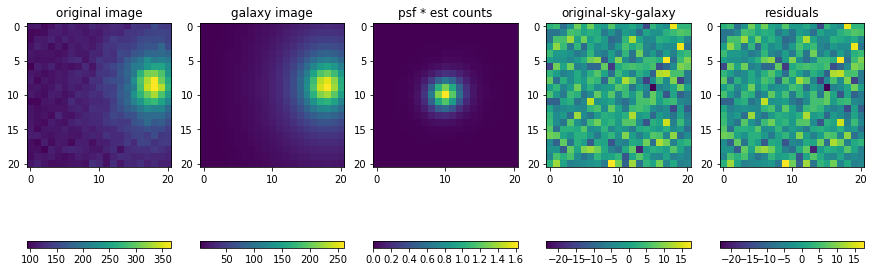

time 15


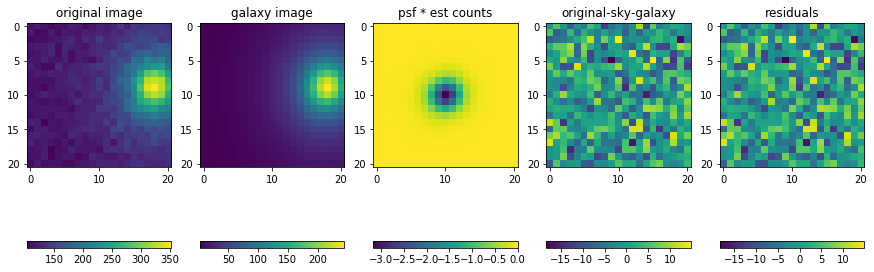

time 16


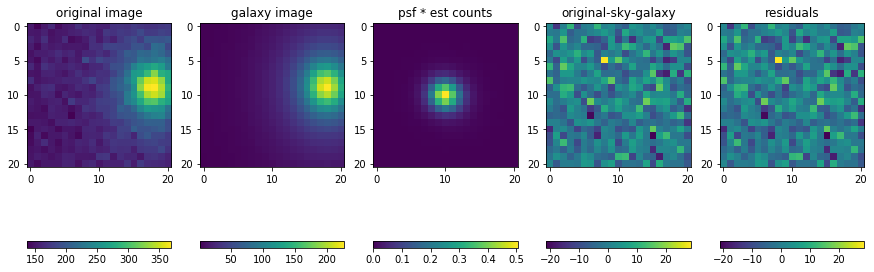

time 17


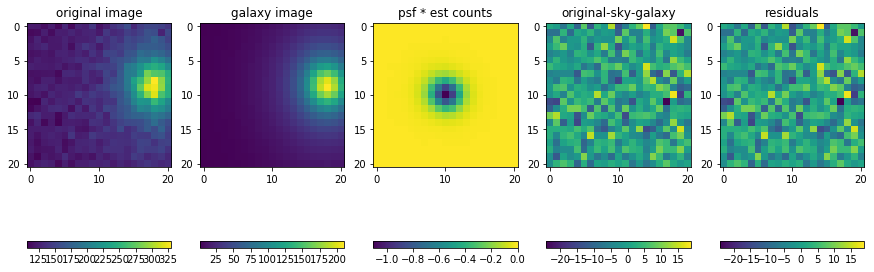

time 18


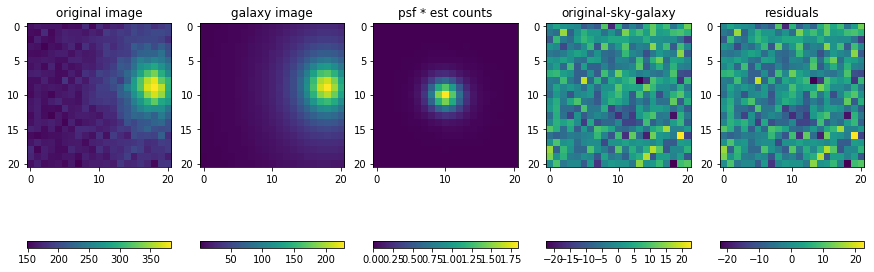

time 19


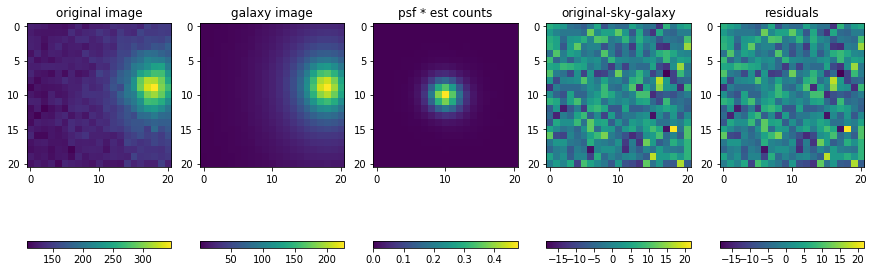

time 20


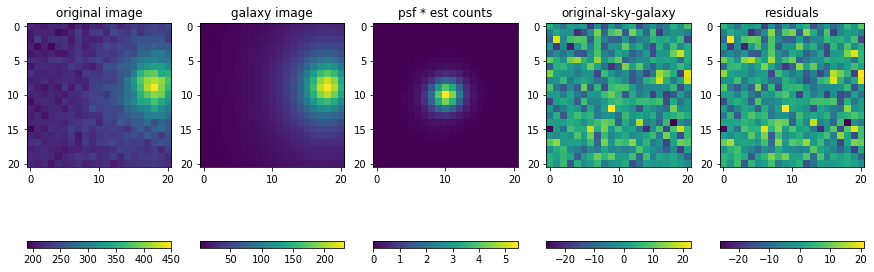

time 21


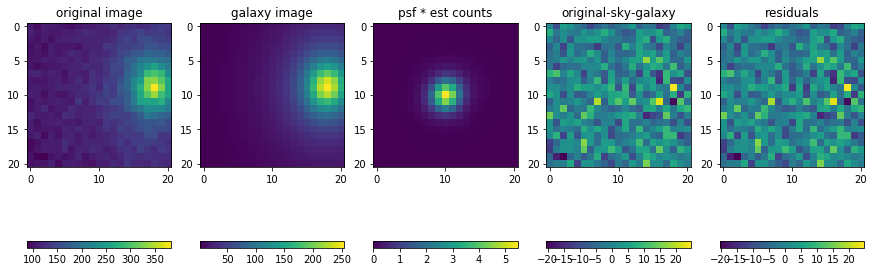

time 22


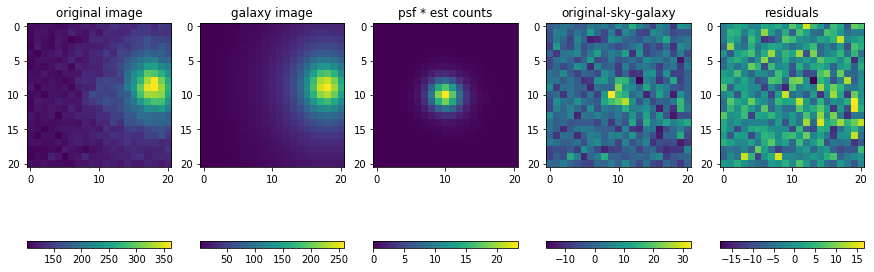

time 23


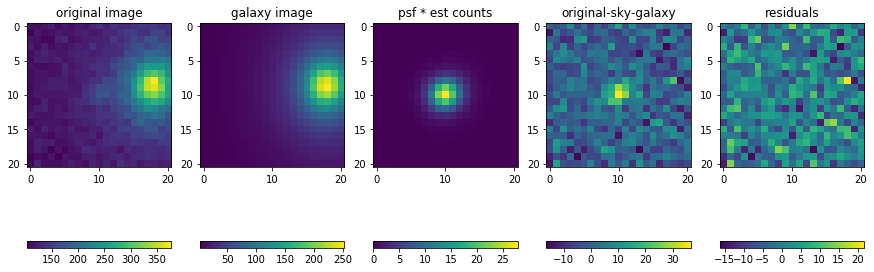

time 24


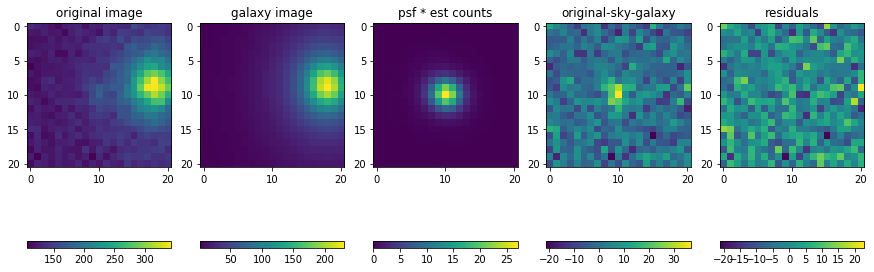

time 25


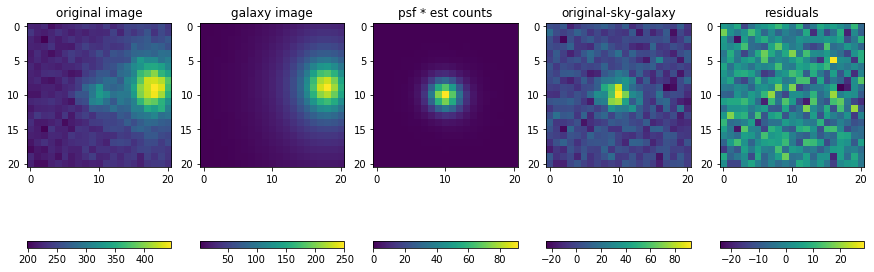

time 26


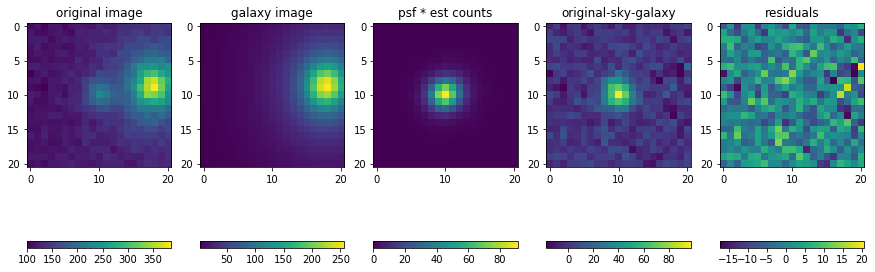

time 27


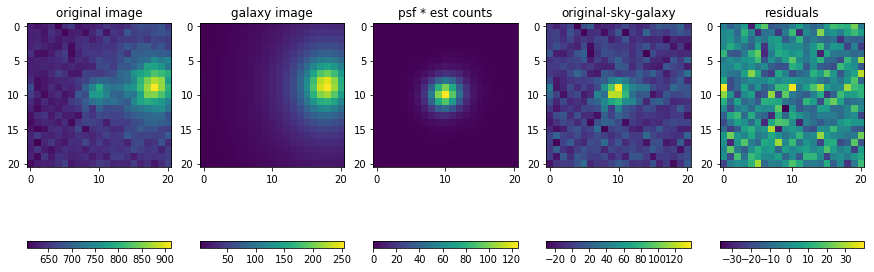

time 28


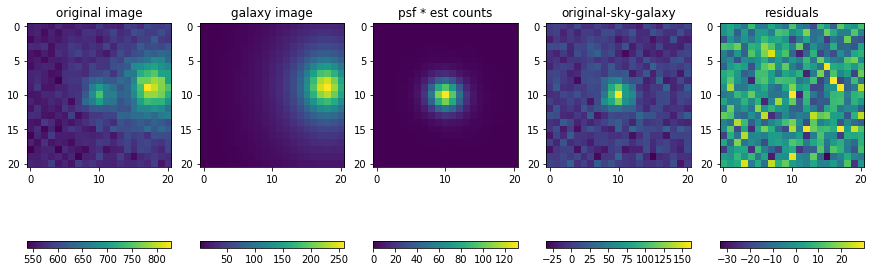

In [7]:
plt.figure(figsize=(12,7))
print("estimated values")
print(np.round(est_lc, decimals=2))
print("estimated variance")
print(np.sqrt(est_variance))
print("simulated values")
print(example_data["count_lightcurves"])
plt.errorbar(days, est_lc, fmt="-o", yerr=2*np.sqrt(est_variance), label="estimated")
plt.plot(days, example_data["count_lightcurves"], "-o", label="simulated")
plt.legend()
plt.show()
for i, count in enumerate(est_lc):
    print("time "+str(i))
    f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(15, 9))
    cax1 = ax1.imshow(example_data["images"][..., i])
    cbar1 = f.colorbar(cax1, ax=ax1, orientation='horizontal')
    ax1.set_title("original image")
    cax2 = ax2.imshow(example_data["galaxy_image"][..., i])
    cbar2 = f.colorbar(cax2, ax=ax2, orientation='horizontal')
    ax2.set_title("galaxy image")
    cax3 = ax3.imshow(example_data["psf_image"][..., i]*est_lc[i])
    cbar3 = f.colorbar(cax3, ax=ax3, orientation='horizontal')
    ax3.set_title("psf * est counts")
    cax4 = ax4.imshow(clean[..., i])
    cbar4 = f.colorbar(cax4, ax=ax4, orientation='horizontal')
    ax4.set_title("original-sky-galaxy")
    cax5 = ax5.imshow(residuals[..., i])
    cbar5 = f.colorbar(cax5, ax=ax5, orientation='horizontal')
    ax5.set_title("residuals")
    plt.show()
    plt.close("all")

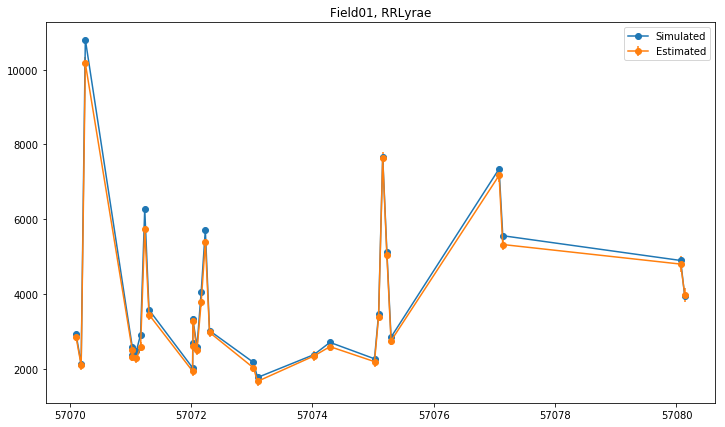

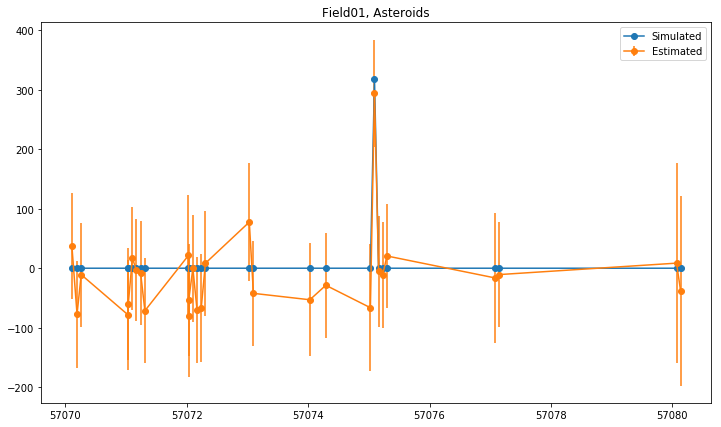

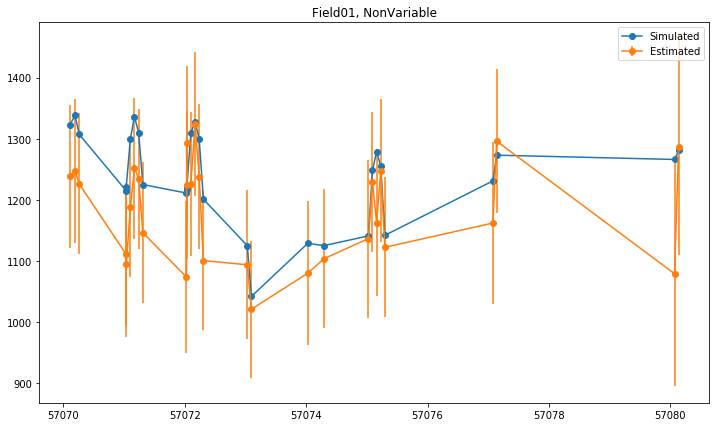

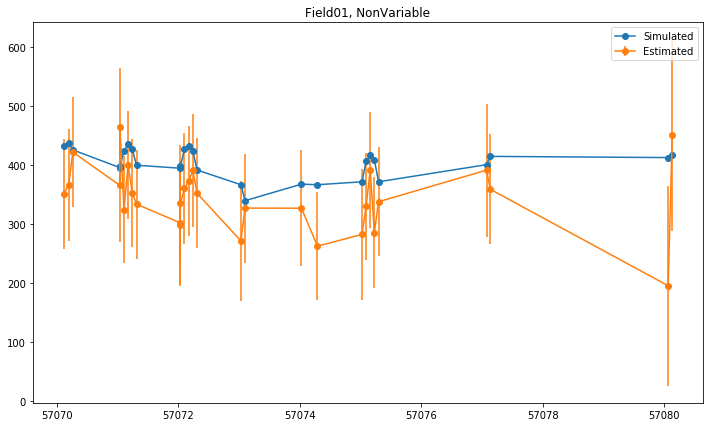

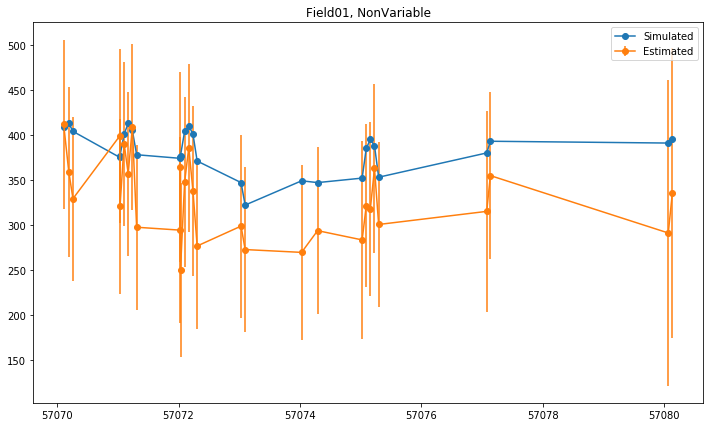

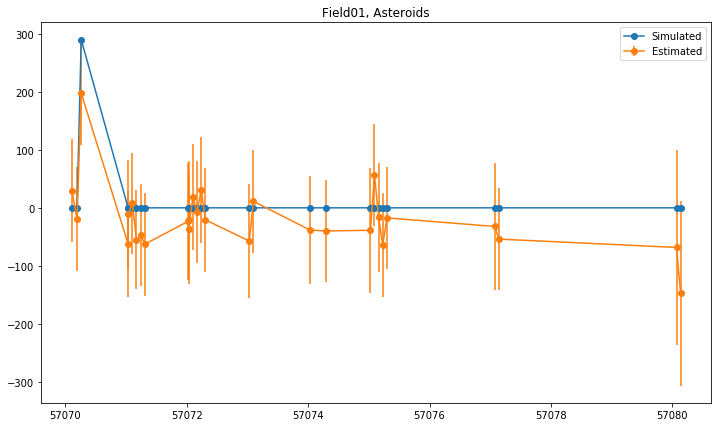

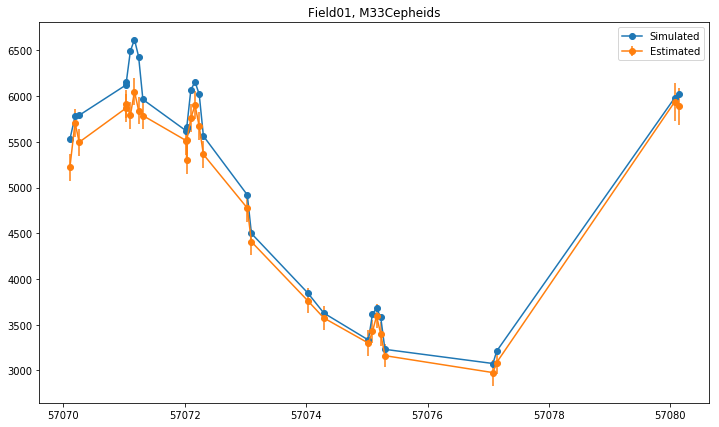

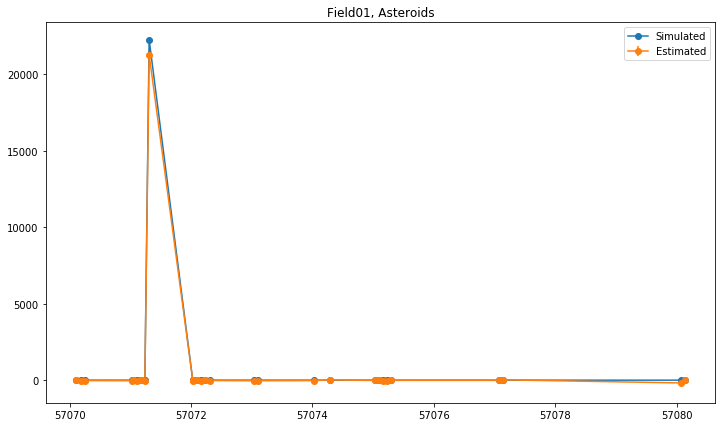

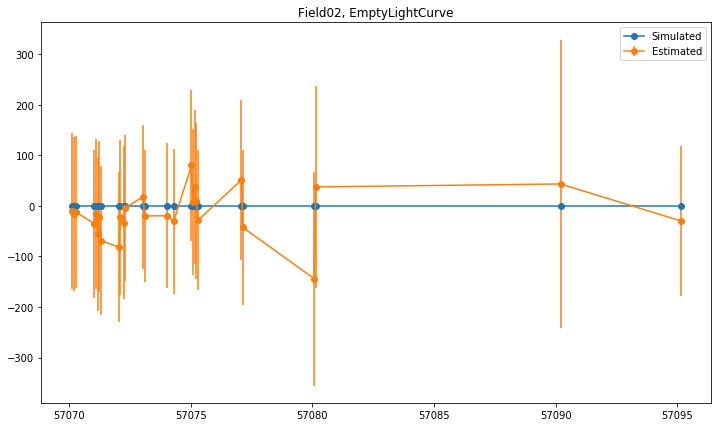

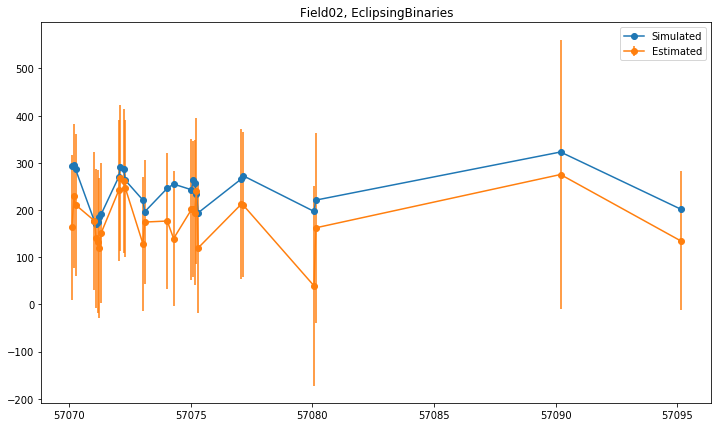

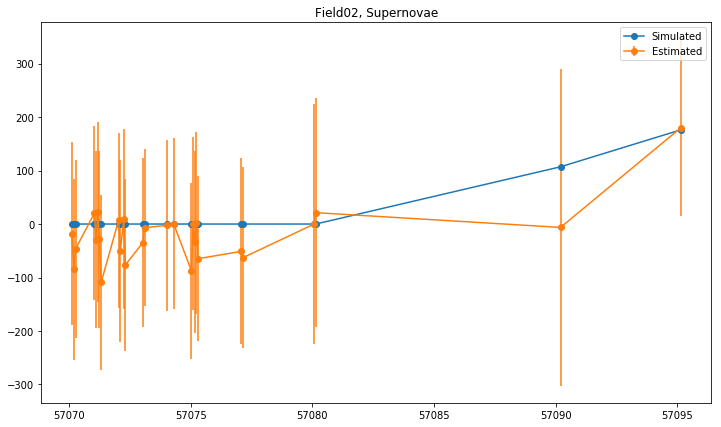

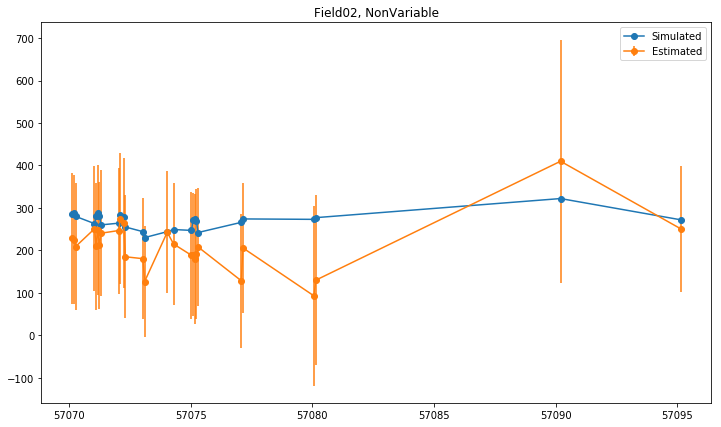

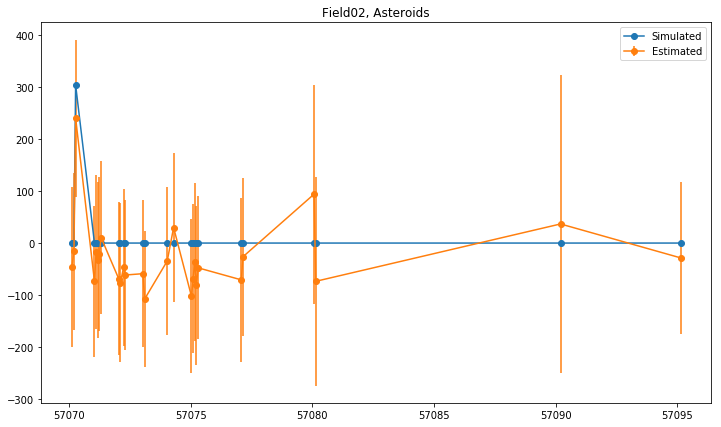

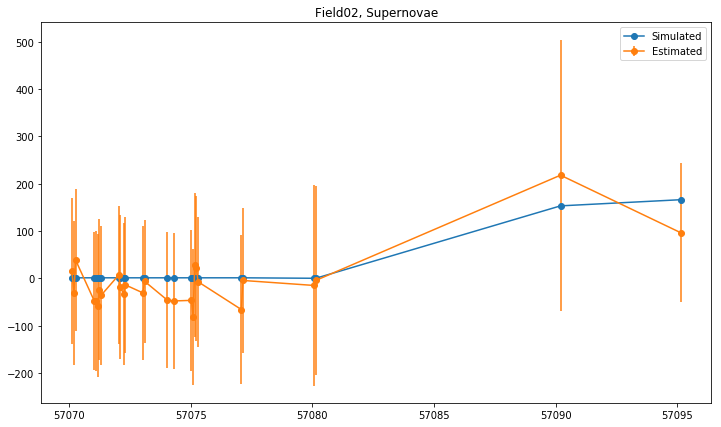

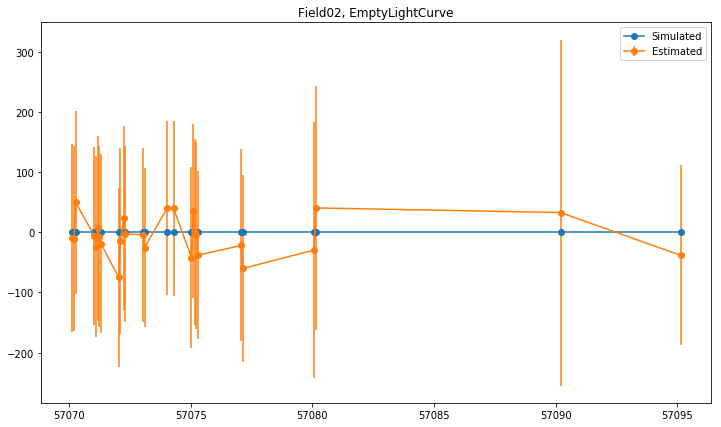

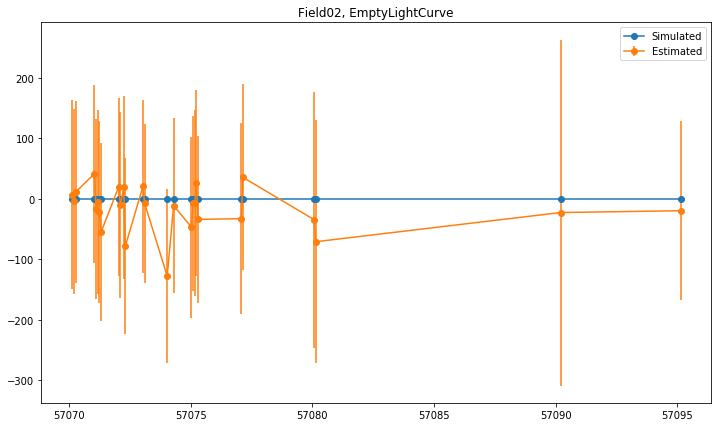

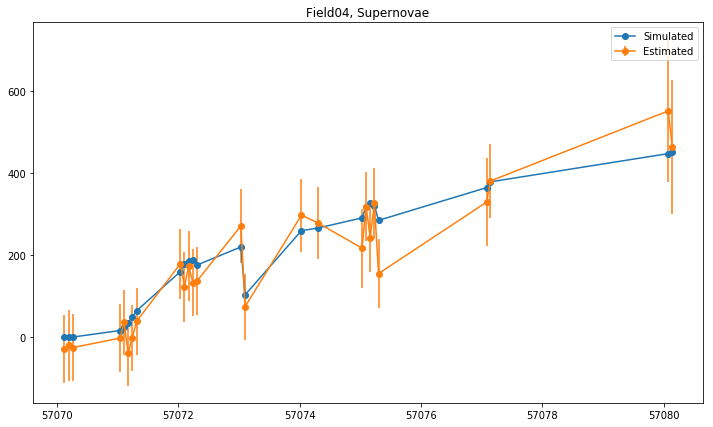

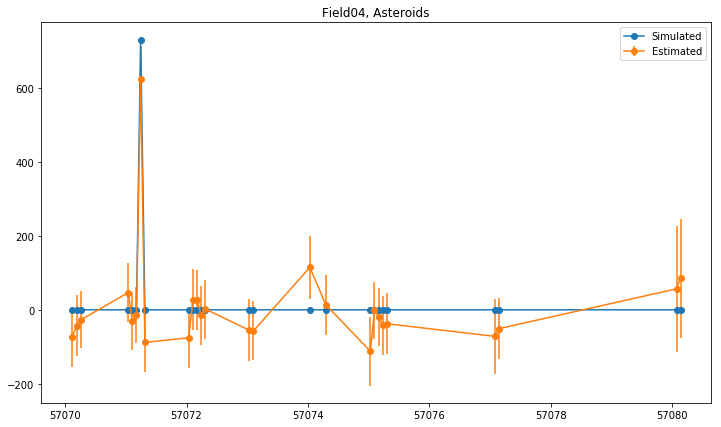

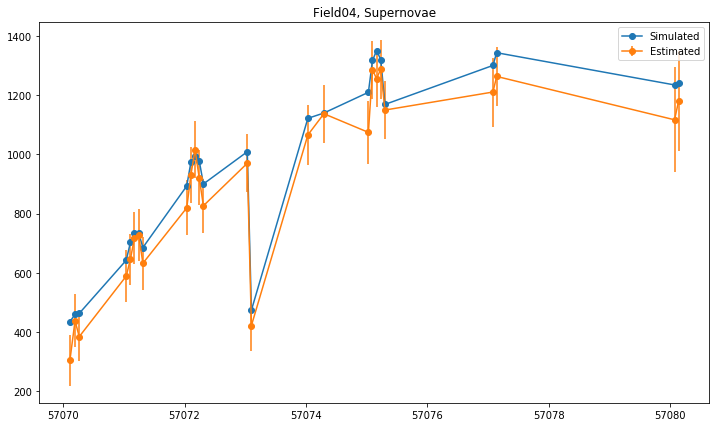

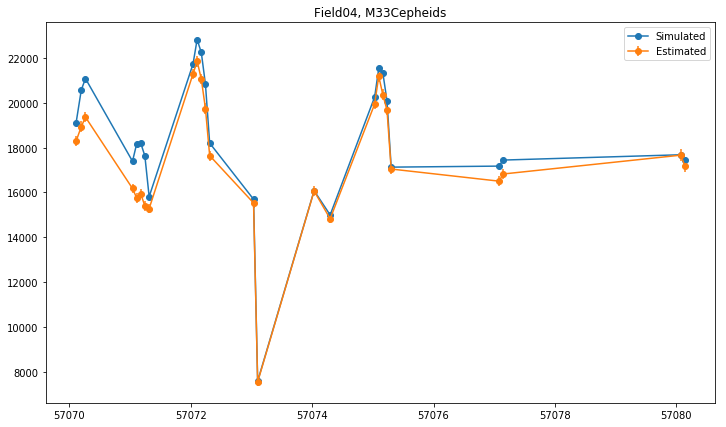

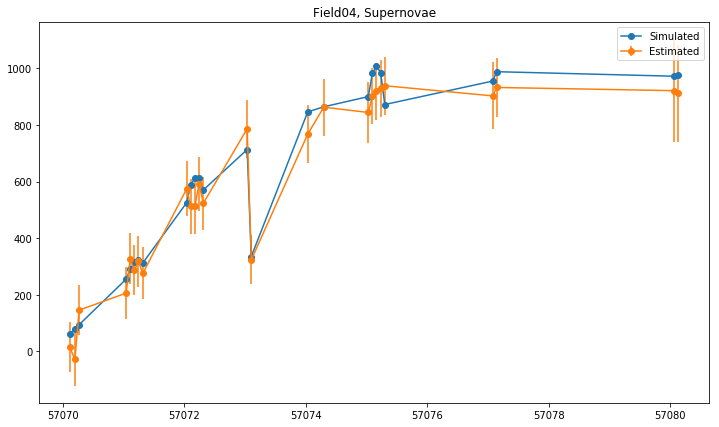

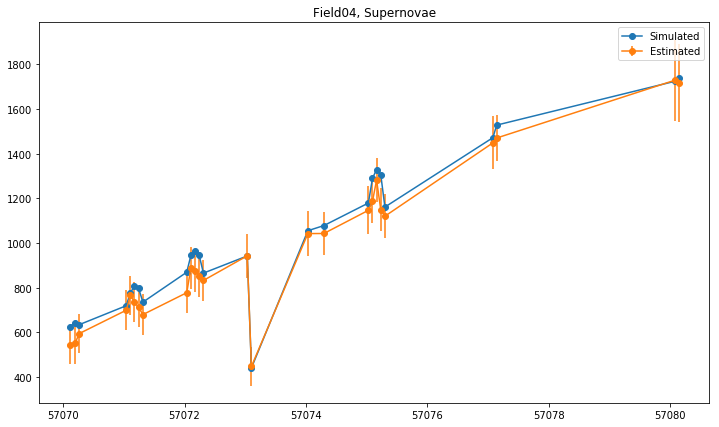

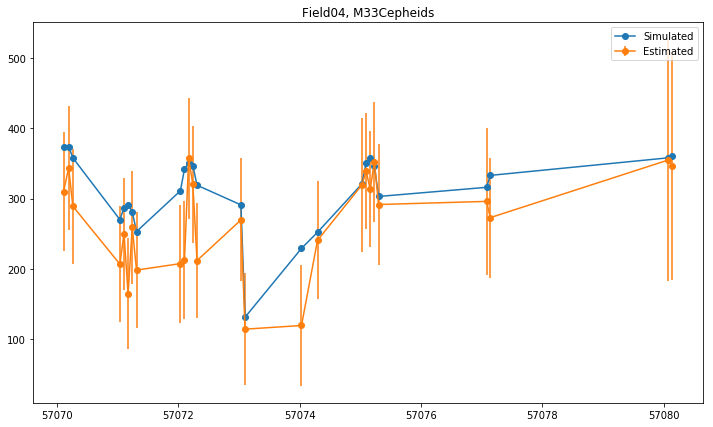

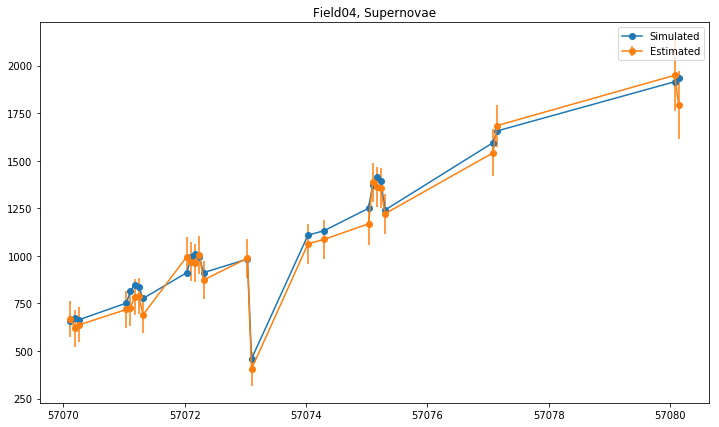

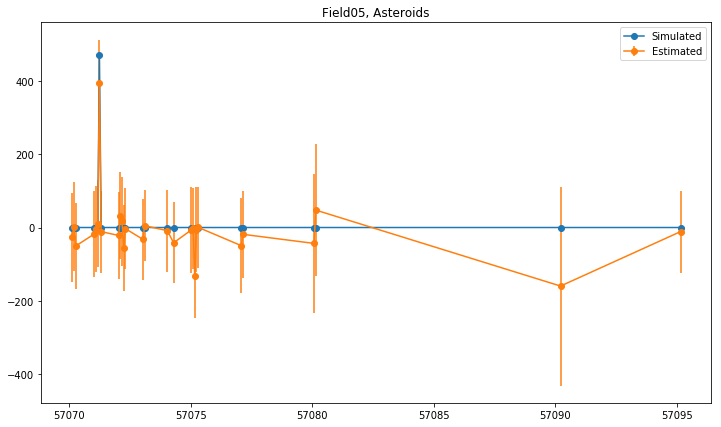

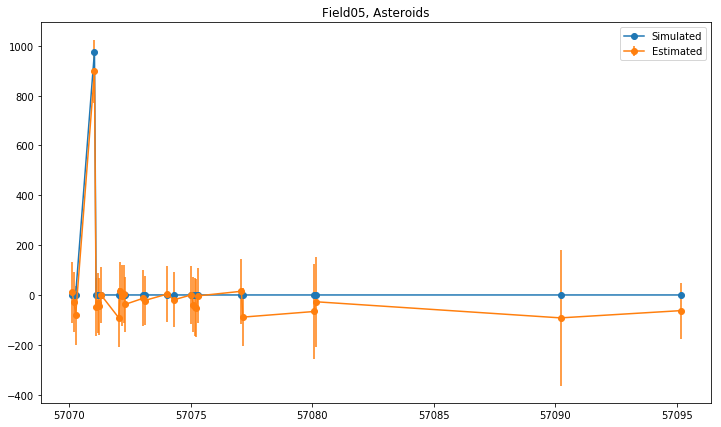

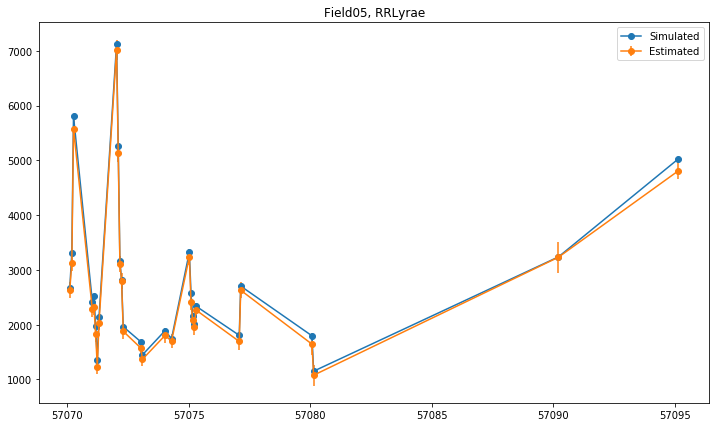

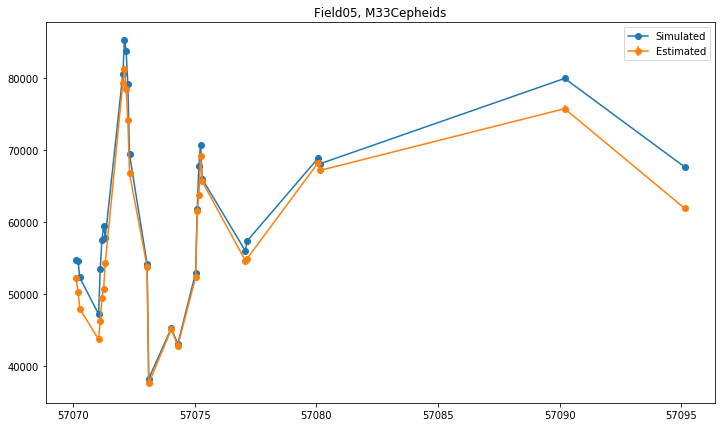

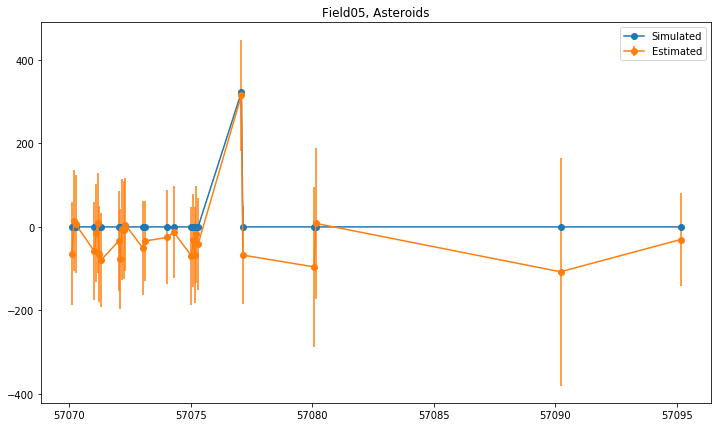

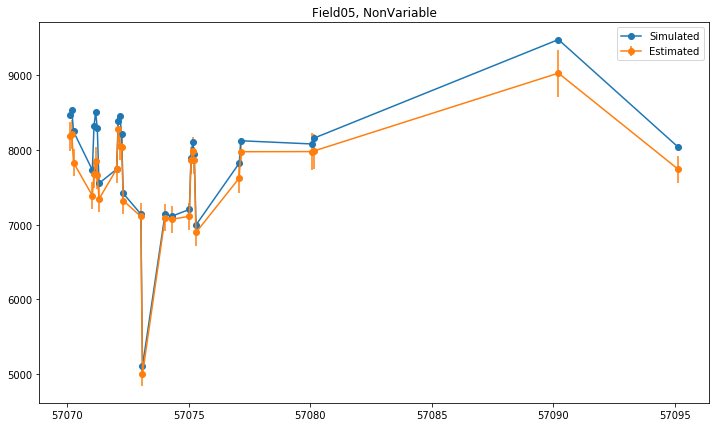

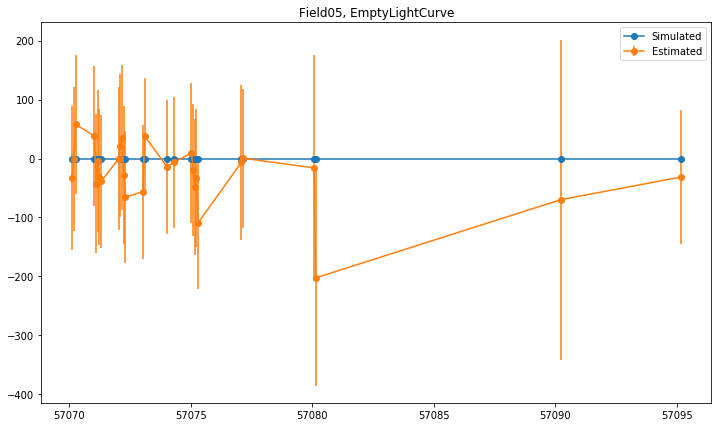

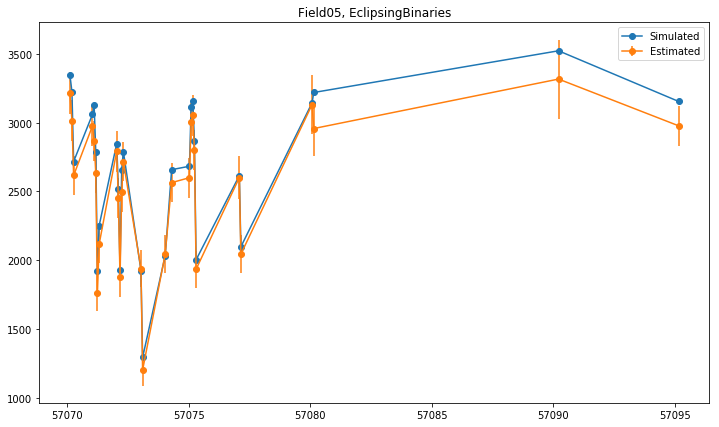

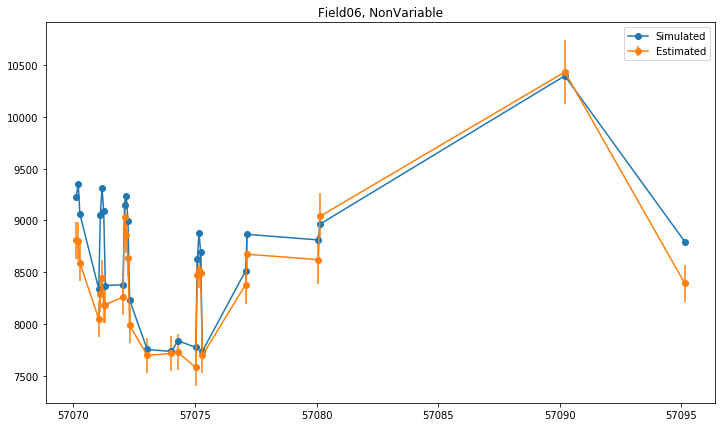

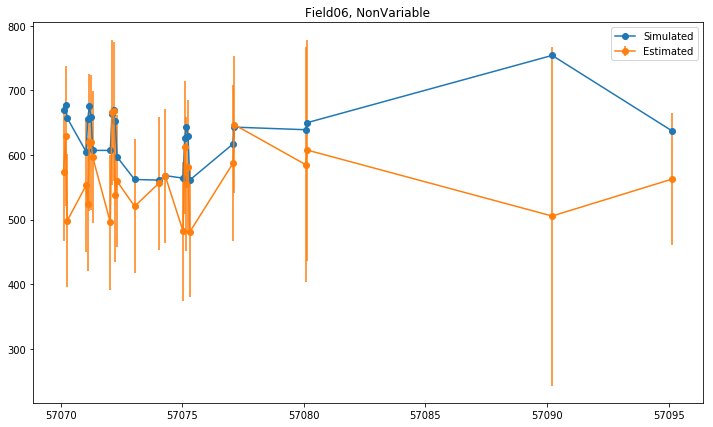

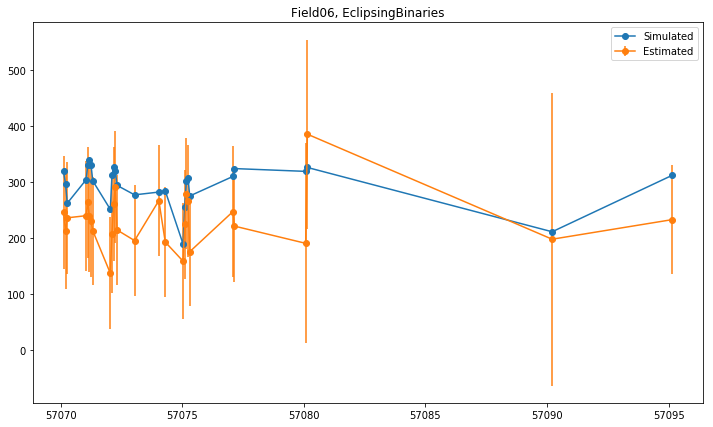

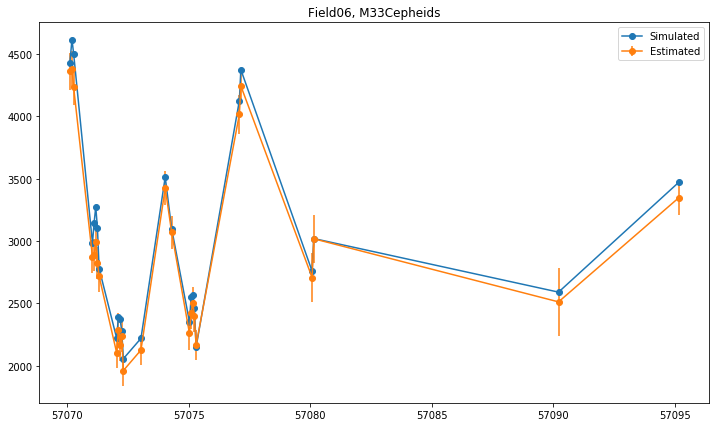

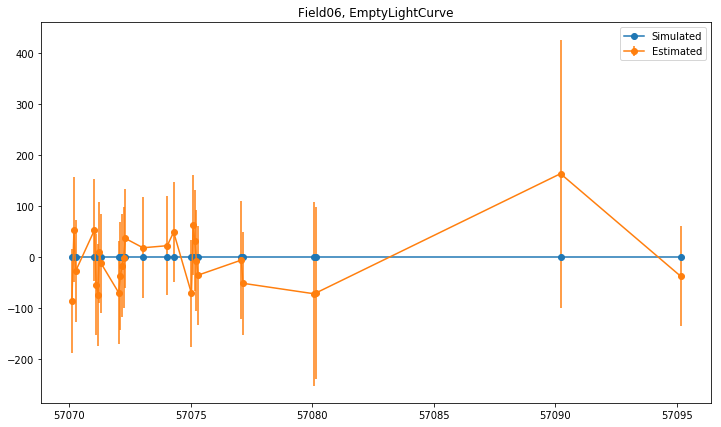

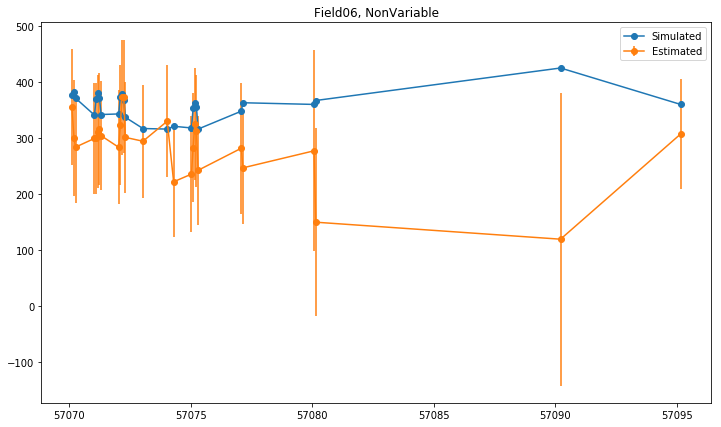

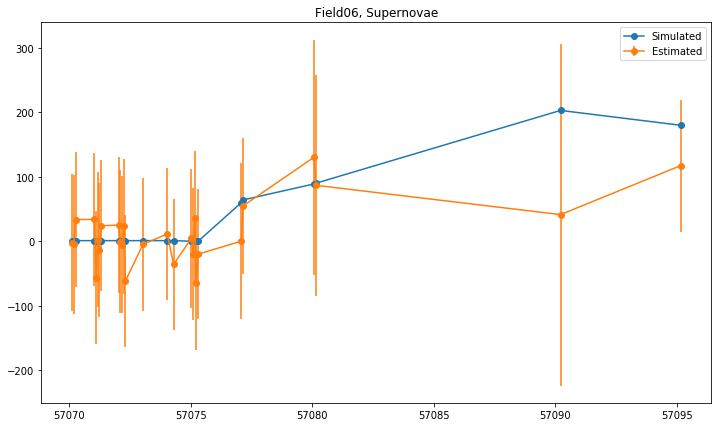

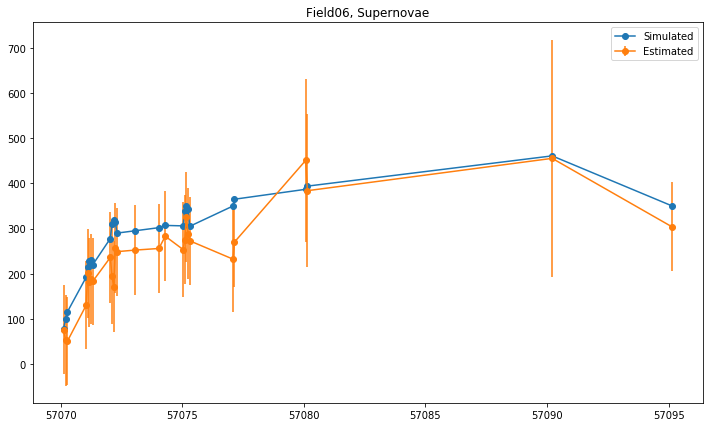

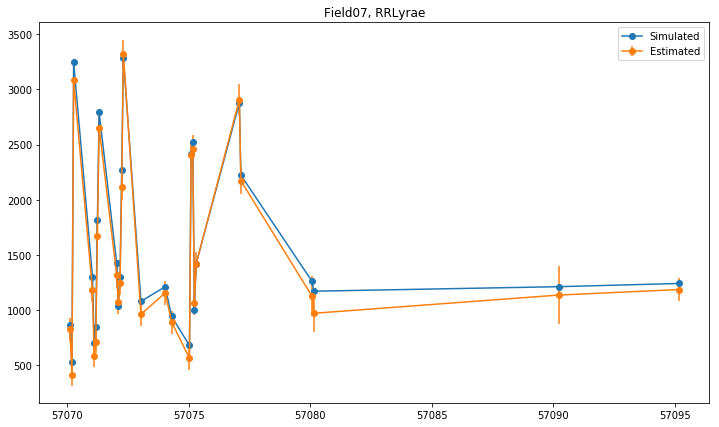

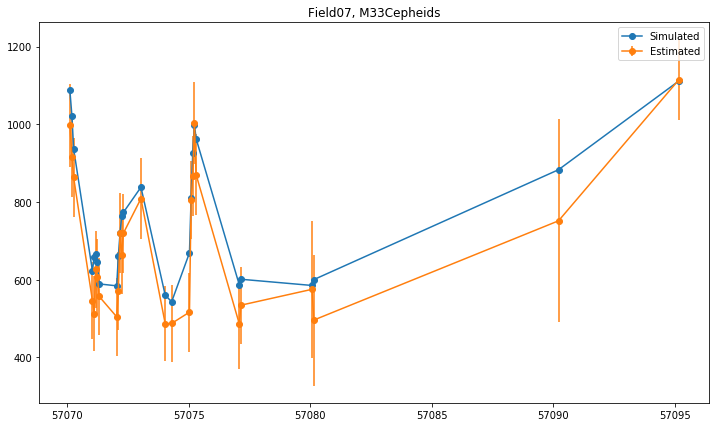

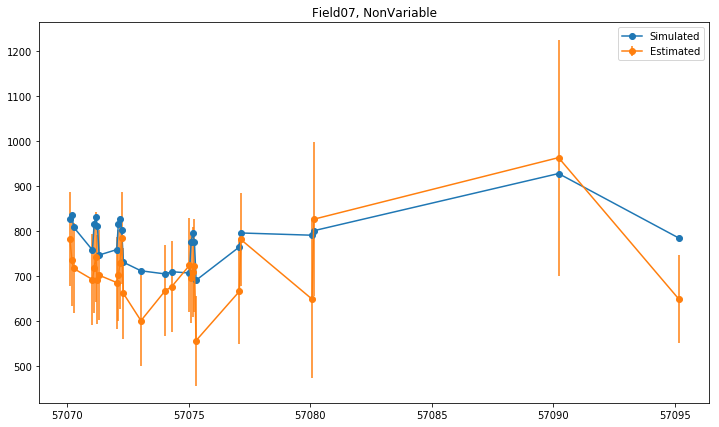

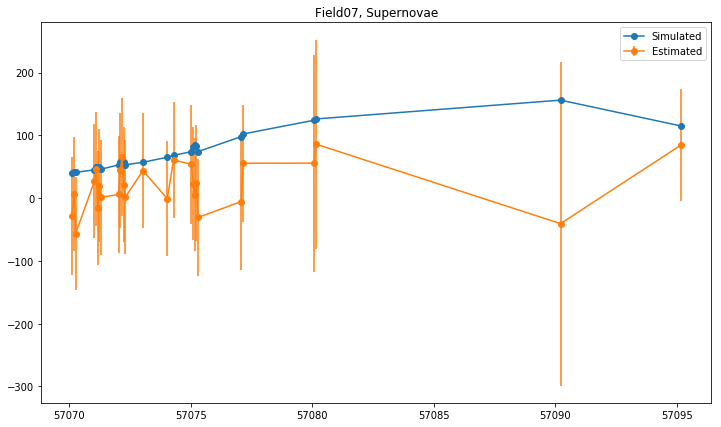

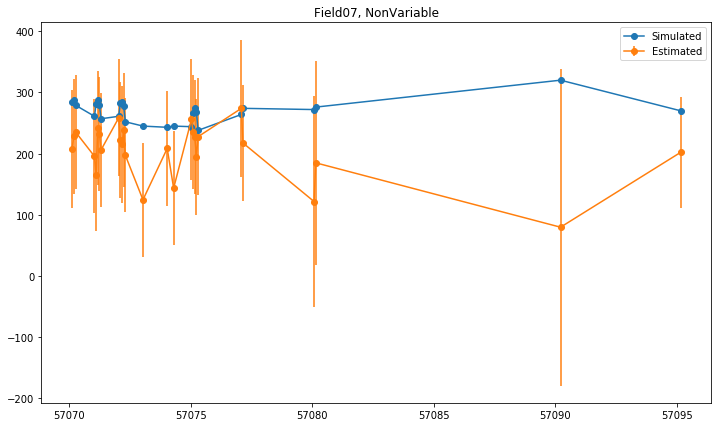

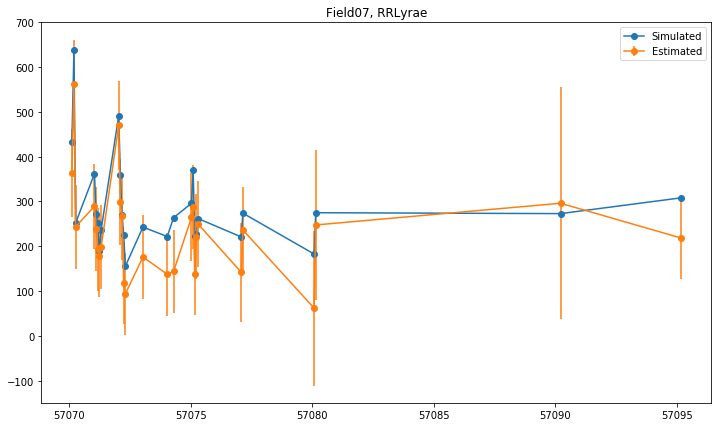

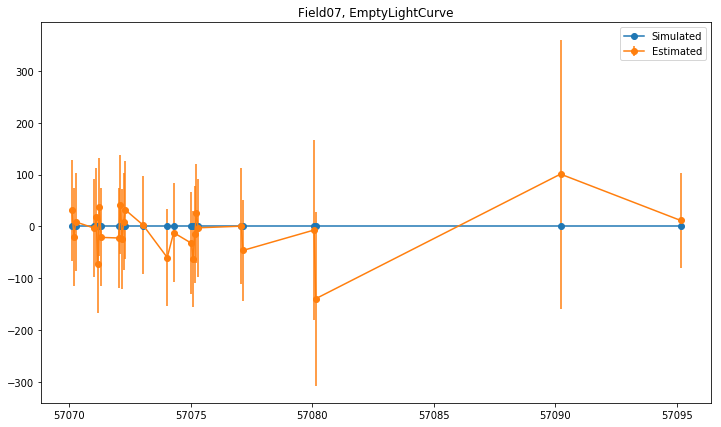

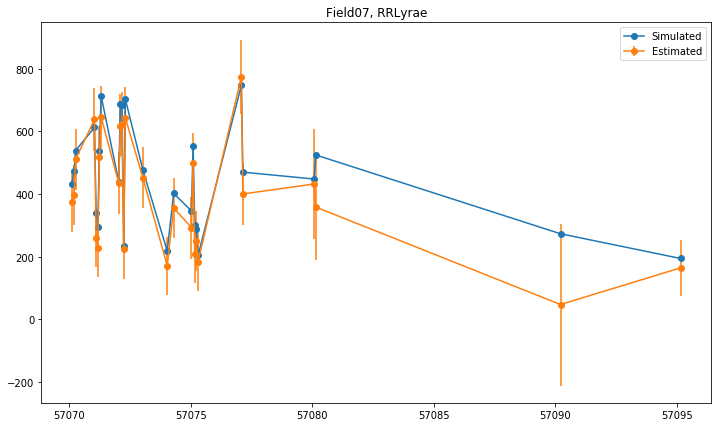

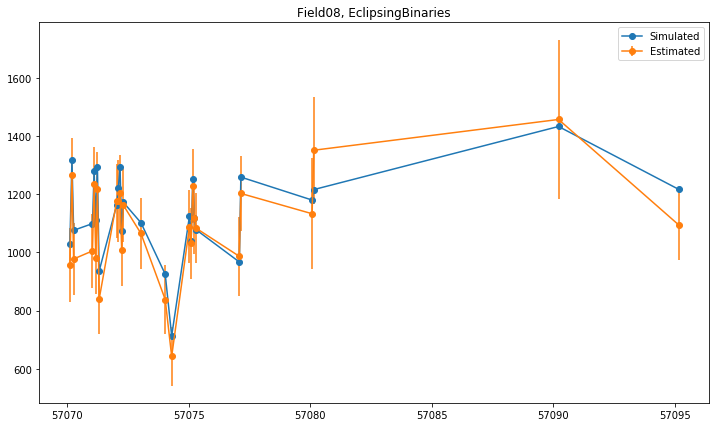

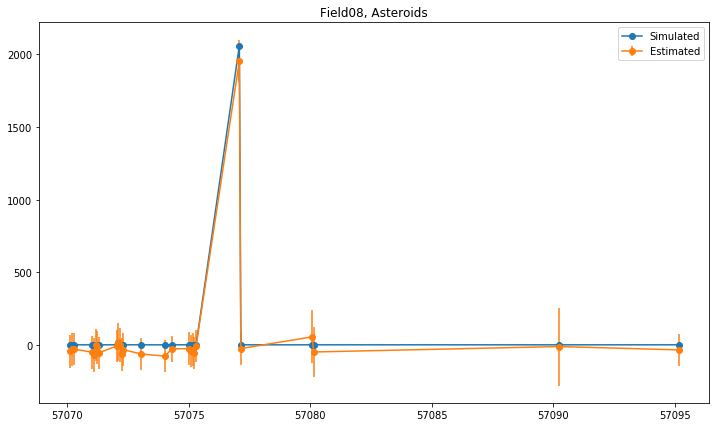

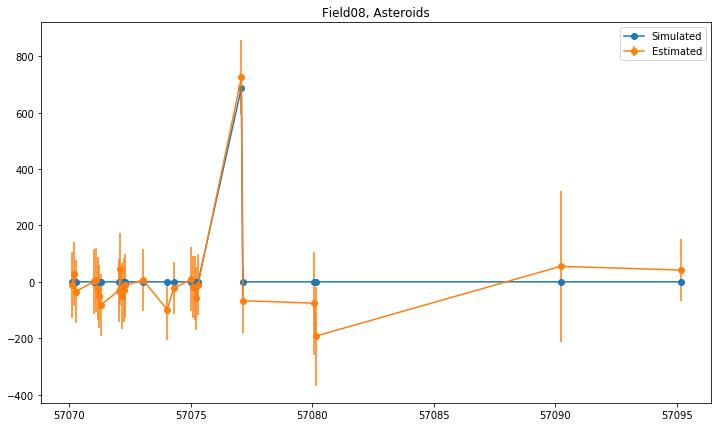

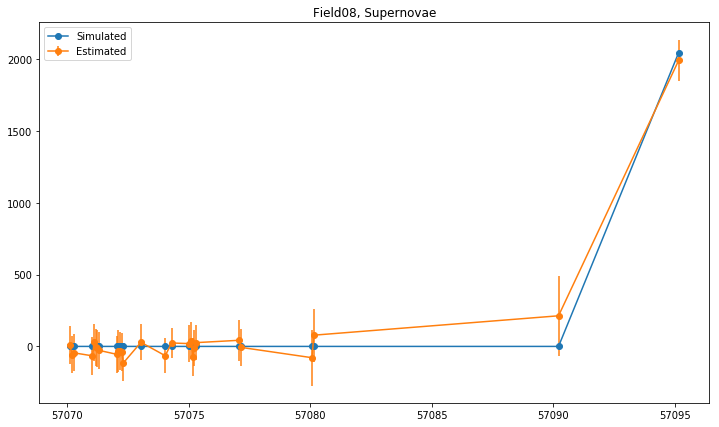

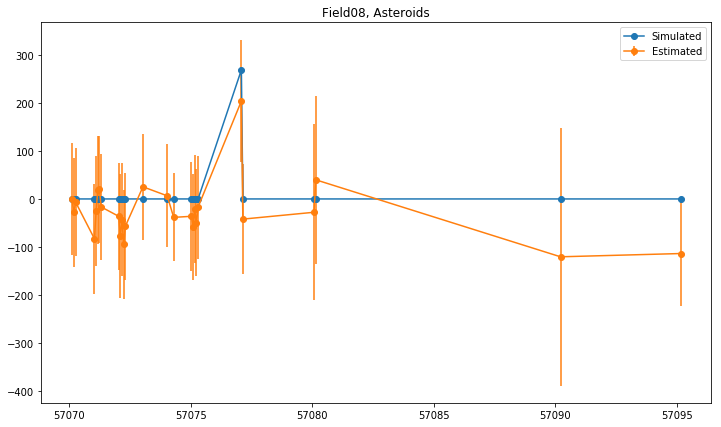

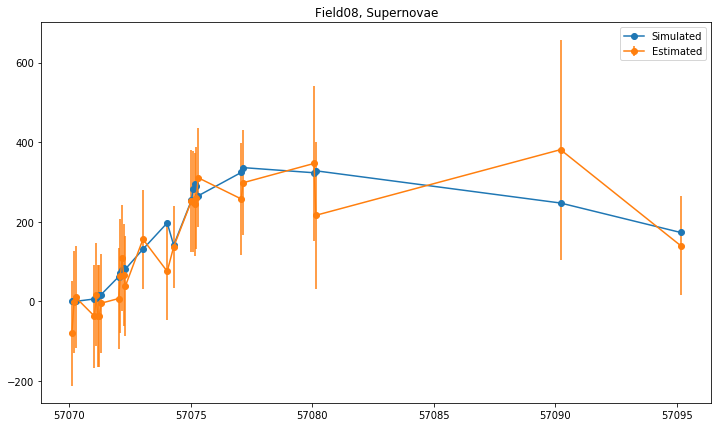

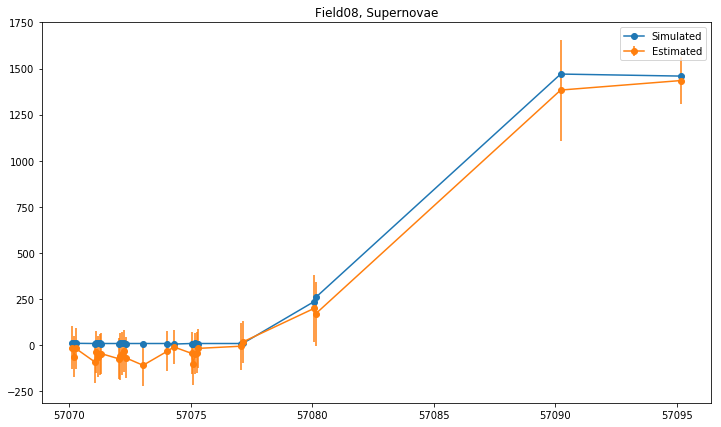

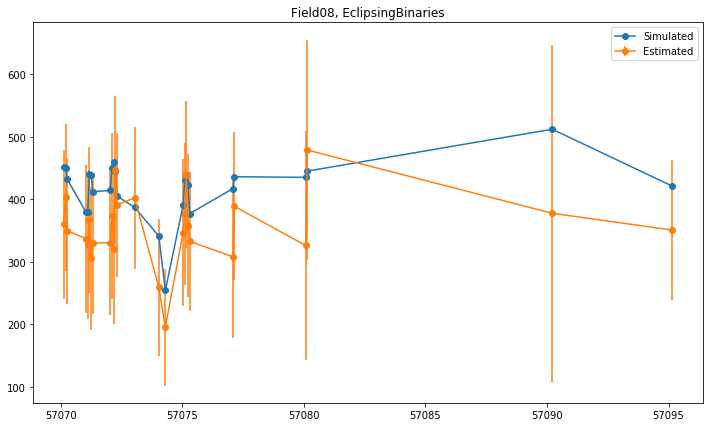

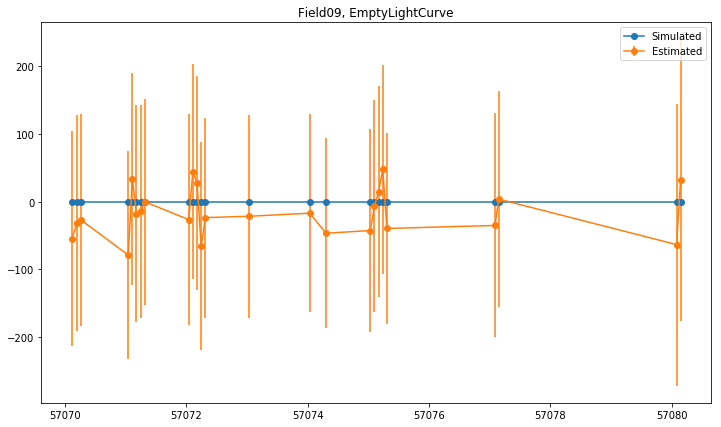

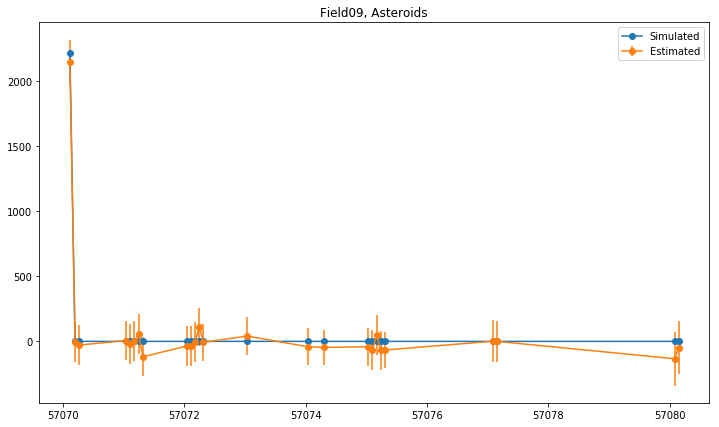

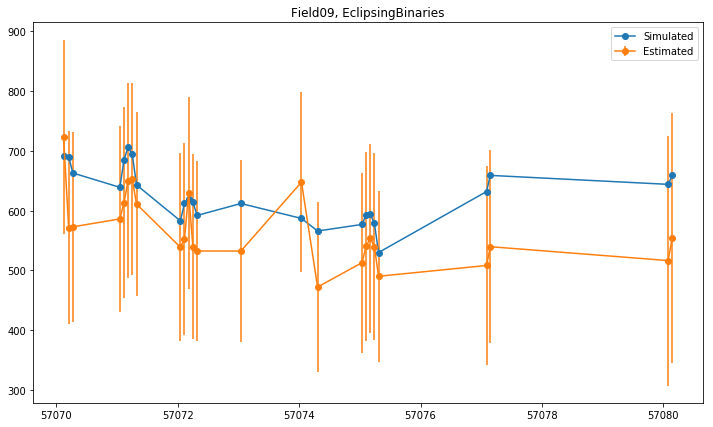

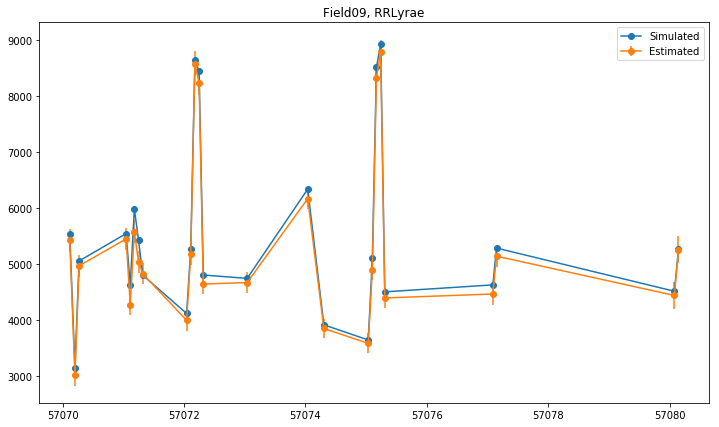

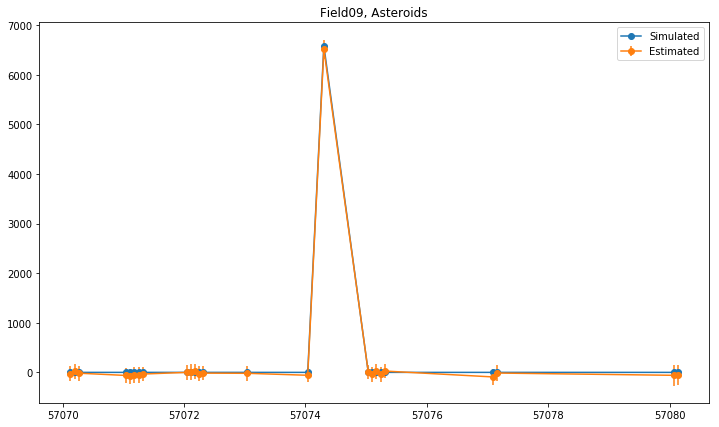

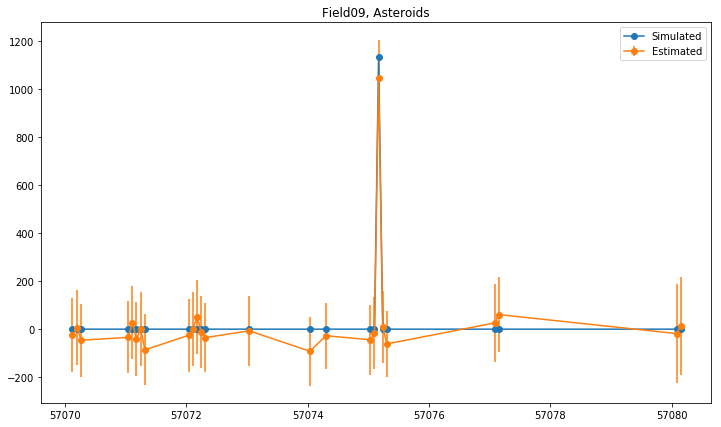

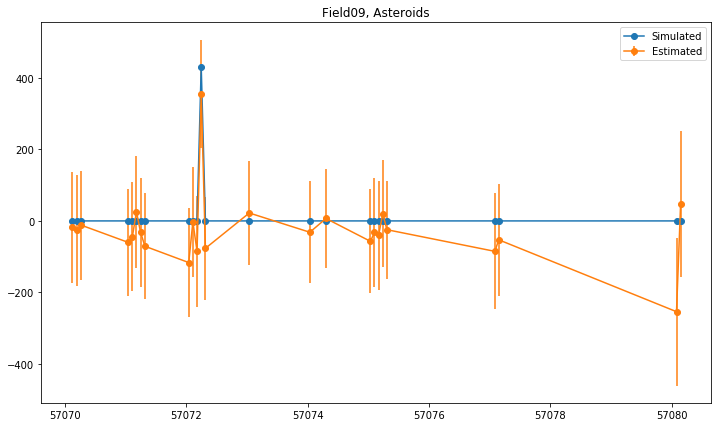

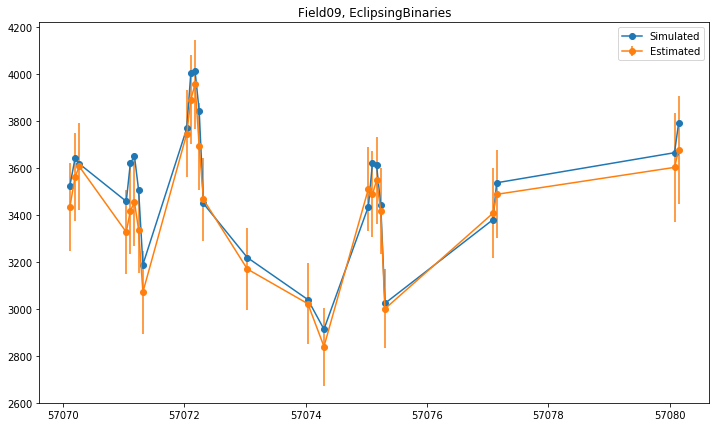

In [9]:
n_fields_to_plot = 8
n_lc_per_field = 8
photometry_data = h5py.File(save_path + file_name + ".hdf5", "r")
for field in list(image_data.keys())[:n_fields_to_plot]:
    days = photometry_data[field]["obs_cond"]["obs_day"]["g"][:]
    for i_lc in range(n_lc_per_field):
        simulated = photometry_data[field]["count_lightcurves"]["g"][i_lc, ...]
        lc_type = photometry_data[field]["lc_type"][i_lc]
        estimated_lc = photometry_data[field]["estimated_count_lc"][i_lc, ...]
        estimated_variance = photometry_data[field]["estimated_count_variance"][i_lc, ...]
        
        plt.figure(figsize=(12, 7))
        plt.plot(days, simulated, "-o", label="Simulated")
        plt.errorbar(days, estimated_lc, fmt="-o", yerr=2*np.sqrt(estimated_variance), label="Estimated")
        plt.title(field+", "+lc_type)
        plt.legend()
        plt.show()
        plt.close("all")